In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
from scipy import stats

In [2]:
df=pd.read_csv("D:\Data Science\Spark project\project 3\SampleSuperstore.csv")

In [5]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head()

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

<AxesSubplot:xlabel='State'>

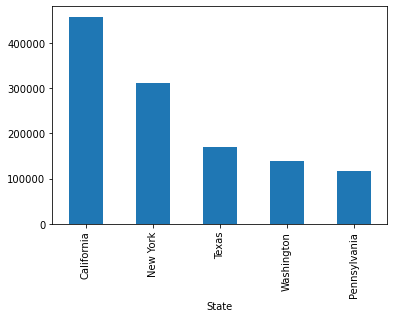

In [10]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head().plot(kind='bar')

In [11]:
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head()

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

<AxesSubplot:ylabel='Profit'>

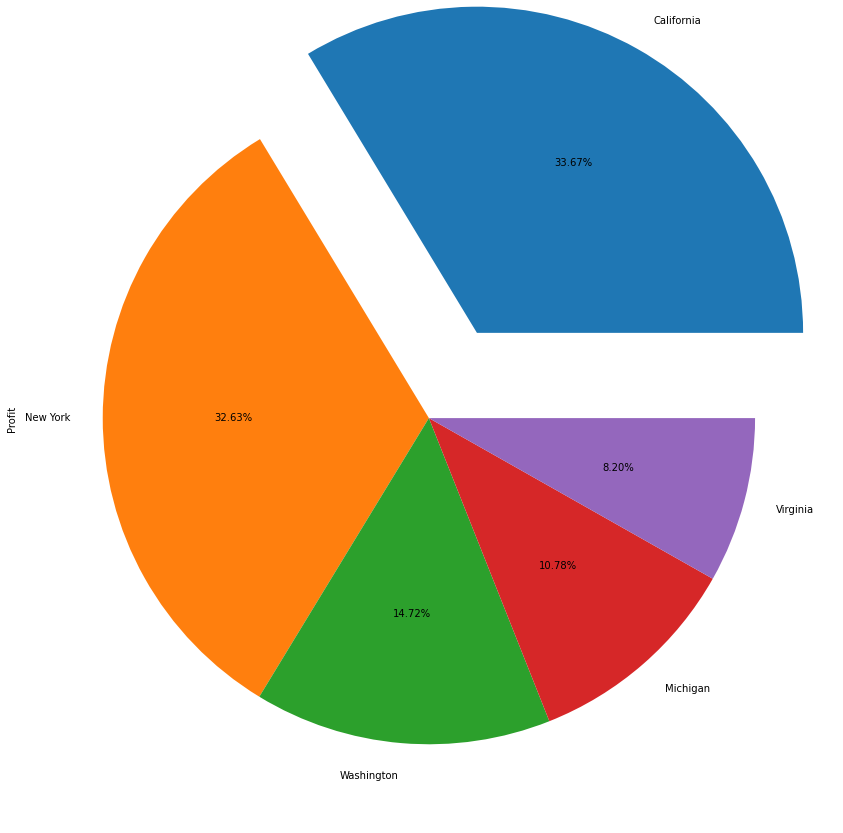

In [12]:
plt.figure(figsize=(15,15))
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head().plot(kind='pie', autopct="%.2f%%",explode=[0.3,0,0,0,0])

In [13]:
df.groupby('State')['Sales'].sum().sort_values(ascending=True).head()

State
North Dakota      919.910
West Virginia    1209.824
Maine            1270.530
South Dakota     1315.560
Wyoming          1603.136
Name: Sales, dtype: float64

<AxesSubplot:ylabel='Sales'>

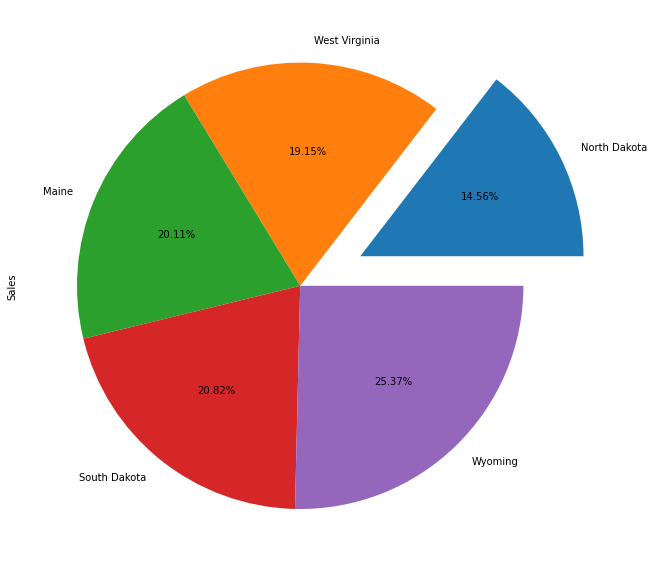

In [14]:
plt.figure(figsize=(10,15))
df.groupby('State')['Sales'].sum().sort_values(ascending=True).head().plot(kind='pie', autopct="%.2f%%",explode=[0.3,0,0,0,0])

In [15]:
df.groupby('State')['Profit'].sum().sort_values(ascending=True).head(10)

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

<AxesSubplot:xlabel='State'>

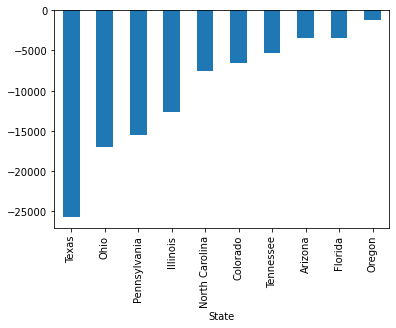

In [16]:
df.groupby('State')['Profit'].sum().sort_values(ascending=True).head(10).plot(kind='bar')

In [22]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Region'>

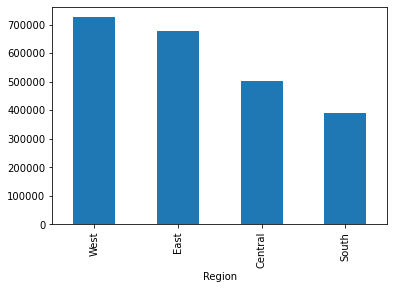

In [23]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

In [27]:
df['Ship Mode'].value_counts()/len(df)*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

In [32]:
df['Ship Mode']=np.where(df['Ship Mode']=='Same Day',np.random.choice(['Standard Class',
                                                                  'First Class','Second Class'],p=[0.60,0.20,0.20]),df['Ship Mode'])

In [33]:
df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)

Ship Mode
Standard Class    164088.7875
Second Class       73338.3943
First Class        48969.8399
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Ship Mode'>

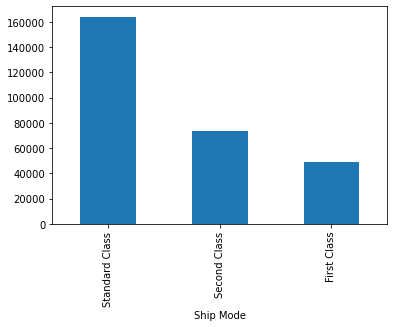

In [34]:
df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

In [35]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Category'>

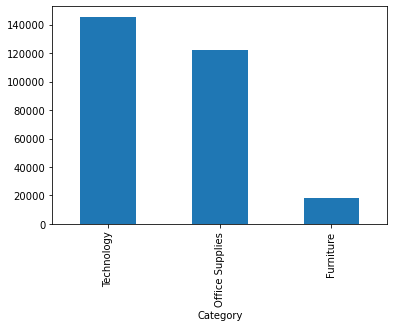

In [36]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

In [44]:
df.groupby('Discount')['Profit'].sum().sort_values(ascending=False)

Discount
0.00    320987.6032
0.20     90337.3060
0.10      9029.1770
0.15      1418.9915
0.32     -2391.1377
0.45     -2493.1111
0.60     -5944.6552
0.30    -10369.2774
0.50    -20506.4281
0.40    -23057.0504
0.80    -30539.0392
0.70    -40075.3569
Name: Profit, dtype: float64

In [37]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

In [42]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)/df['Profit'].sum()*100

Region
West       37.855997
East       31.956610
South      16.323295
Central    13.864098
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Region'>

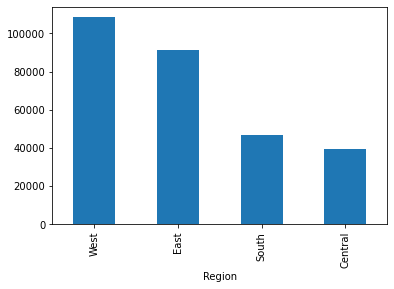

In [43]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
Business insights
1.The West region is doing best in their business
2.The Central and South region have to concentrate more on their profits
3.They can increase the technological project for their products
4.The regions which are making no profit in those regions could be improved .
5.The state branches which having no profit can affect the overall performances of the regions.
6.Discount could be taken off for the products which are not making that much profit.
7.California,New York,Washington,Michigan and Virginia are the state at Top 5 business making states.
